In [1]:
import sys, re
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random

import torch
import torch.nn as nn  
import torch.optim as optim  
import torchvision.transforms as transforms  
import torchvision
from torch.utils.data import (Dataset,DataLoader)
import torch
from torch.utils.data import Dataset, DataLoader
import time

# Allergen dataset

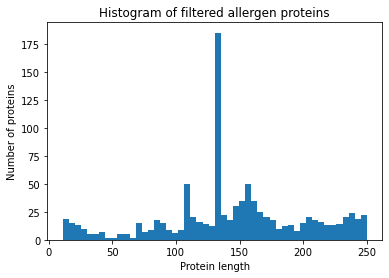

Total proteins left: 965
Minimum length: 11
Maximum length: 250
Mean: 143.98341968911916
Median: 137.0
Mode: 134


In [2]:
#Define a class to  filter out  the unwanted proteins
def filter_fasta(input_file, output_file, min_length, max_length):
    with open(input_file, 'r') as f:
        lines = f.readlines()

    filtered_proteins = []
    filtered_lengths = []

    current_protein = None
    current_sequence = []

    for line in lines:
        if line.startswith('>'):
            if current_protein is not None:
                sequence = ''.join(current_sequence)
                sequence_length = len(sequence)
                if min_length <= sequence_length <= max_length:
                    filtered_proteins.append(current_protein + '\n' + sequence)
                    filtered_lengths.append(sequence_length)
            current_protein = line.strip()
            current_sequence = []
        else:
            current_sequence.append(line.strip())

    # Check the last protein after the loop ends
    if current_protein is not None:
        sequence = ''.join(current_sequence)
        sequence_length = len(sequence)
        if min_length <= sequence_length <= max_length:
            filtered_proteins.append(current_protein + '\n' + sequence)
            filtered_lengths.append(sequence_length)

    with open(output_file, 'w') as f:
        f.write('\n'.join(filtered_proteins))

    # Calculate statistics
    total_proteins = len(filtered_proteins)
    min_length = min(filtered_lengths)
    max_length = max(filtered_lengths)
    mean = np.mean(filtered_lengths)
    median= np.median(filtered_lengths)
    mode = stats.mode(filtered_lengths)

    # Plot distribution
    plt.hist(filtered_lengths, bins=50)
    plt.xlabel('Protein length')
    plt.ylabel('Number of proteins')
    plt.title('Histogram of filtered allergen proteins')
    plt.show()

    return total_proteins, min_length, max_length, mean, median, mode

# Usage
total, minimum, maximum,mean,median,mode = filter_fasta('Allergen_Proteins.fasta', 'Filtered_Allergen_Proteins.fasta', 10, 250)
print("Total proteins left:", total)
print("Minimum length:", minimum)
print("Maximum length:", maximum)
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode[0][0])

In [3]:
def map_sequence(sequence, mapping):
    map = [mapping[aa] for aa in sequence if aa in mapping]
    return np.array(map)

def map_fasta(input_file, mapping):
    with open(input_file, 'r') as f:
        lines = f.readlines()

    mapped_sequences = []

    current_protein_id = None
    current_sequence = ''
    for line in lines:
        if line.startswith('>'):
            if current_protein_id and current_sequence:
                mapped_sequence = map_sequence(current_sequence, mapping)
                mapped_sequences.append((current_protein_id, mapped_sequence))
            current_protein_id = line.strip()[1:]
            current_sequence = ''
        else:
            current_sequence += line.strip()

    # Process the last protein sequence
    if current_protein_id and current_sequence:
        mapped_sequence = map_sequence(current_sequence, mapping)
        mapped_sequences.append((current_protein_id, mapped_sequence))

    return mapped_sequences

# Mapping of amino acids to numbers
mapping = {
    'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10,
    'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19,
    'Y': 20, 'X': 0, 'Z': 0
}

# Input FASTA file path
input_file = 'Filtered_Allergen_Proteins.fasta'


mapped_sequences = map_fasta(input_file, mapping)

# Unkwown proteins

In [4]:
input_file = 'NOT_Allergen_Proteins.fasta'
output_file = 'Reduced_NOT_Allergen_Proteins.fasta'
selected = 2500


proteins = list(SeqIO.parse(input_file, 'fasta'))


selected_proteins = random.sample(proteins, selected)

# Write the selected protein records to the output file
SeqIO.write(selected_proteins, output_file, 'fasta')

print(f"Selected {selected} proteins and saved them as '{output_file}'.")

Selected 2500 proteins and saved them as 'Reduced_NOT_Allergen_Proteins.fasta'.


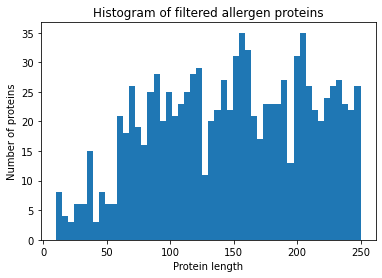

Total proteins left: 1018
Minimum length: 10
Maximum length: 250
Mean: 148.4557956777996
Median: 151.0
Mode: 201


In [5]:
# Usage
total, minimum, maximum, mean,median,mode = filter_fasta('Reduced_NOT_Allergen_Proteins.fasta', 'Filtered_NOT_Allergen_Proteins.fasta', 10, 250)
print("Total proteins left:", total)
print("Minimum length:", minimum)
print("Maximum length:", maximum)
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode[0][0])

In [6]:
#convert amino acid sequences to numbers
def map_sequence(sequence, mapping):
    map = [mapping[aa] for aa in sequence if aa in mapping]
    return np.array(map)

def map_fasta(input_file, mapping):
    with open(input_file, 'r') as f:
        lines = f.readlines()

    mapped_sequences = []

    current_protein_id = None
    current_sequence = ''
    for line in lines:
        if line.startswith('>'):
            if current_protein_id and current_sequence:
                mapped_sequence = map_sequence(current_sequence, mapping)
                mapped_sequences.append((current_protein_id, mapped_sequence))
            current_protein_id = line.strip()[1:]
            current_sequence = ''
        else:
            current_sequence += line.strip()

    # Process the last protein sequence
    if current_protein_id and current_sequence:
        mapped_sequence = map_sequence(current_sequence, mapping)
        mapped_sequences.append((current_protein_id, mapped_sequence))

    return mapped_sequences

# Mapping of amino acids to numbers
mapping = {
    'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10,
    'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19,
    'Y': 20, 'X': 0 , 'U': 0, 'B': 0, 'J': 0, 'O': 0,'Z':0
}

# Input FASTA file path
input_file = 'Filtered_NOT_Allergen_Proteins.fasta'


mapped_sequences = map_fasta(input_file, mapping)  

# Merge datasets

In [7]:
def sequence_padding(sequences, max_length):
    padded_sequences = []
    for seq in sequences:
        padding_length = max_length - len(seq)
        padded_seq = seq + "X" * padding_length  # Padding with a special token, "X"
        padded_sequences.append(padded_seq)
    return padded_sequences

allergen_sequences = []
allergen_headers = []

with open("Filtered_Allergen_Proteins.fasta", "r") as file:
    lines = file.readlines()

for line in lines:
    if line.startswith(">"):
        allergen_headers.append(line.strip())
    else:
        allergen_sequences.append(line.strip())
        


non_allergen_sequences = []
non_allergen_headers = []

with open("Filtered_NOT_Allergen_Proteins.fasta", "r") as file:
    lines = file.readlines()

for line in lines:
    if line.startswith(">"):
        non_allergen_headers.append(line.strip())
    else:
        non_allergen_sequences.append(line.strip())

# Step 2: Create a merged dataset
merged_sequences = allergen_sequences + non_allergen_sequences
merged_labels = [1] * len(allergen_sequences) + [0] * len(non_allergen_sequences)

# Shuffle the protein order
merged_data = list(zip(merged_sequences, merged_labels))
random.shuffle(merged_data)
merged_sequences, merged_labels = zip(*merged_data)

# Step 3: Determine the maximum sequence length for padding
max_length = max(len(seq) for seq in merged_sequences)

# Step 4: Apply sequence padding
padded_sequences = sequence_padding(merged_sequences, max_length)

# Step 5: Save the merged dataset with padded sequences
with open("Proteins.fasta", "w") as file:
    for i in range(len(padded_sequences)):
        file.write("> Label:" + str(merged_labels[i]) + "\n")
        file.write(padded_sequences[i] + "\n")

# Print the total number of proteins
total_proteins = len(padded_sequences)
print("Total number of proteins:", total_proteins)


label_1 = sum(label == 1 for label in merged_labels)
label_0 = sum(label == 0 for label in merged_labels)

print("Total number of allergen proteins:", label_1)
print("Total number of non allergen proteins:", label_0)
print("Max length:",max_length)
# Print the first 5 proteins
print("First 5 proteins:")
for i in range(5):
    print("Label:", merged_labels[i])
    print("Sequence:", padded_sequences[i])
    print()

Total number of proteins: 1983
Total number of allergen proteins: 965
Total number of non allergen proteins: 1018
Max length: 250
First 5 proteins:
Label: 1
Sequence: MGVFNYETEATSVIPAARLFKAFILDGDNLFPKVAPQAISSVENIEGNGGPGTIKKISFPEGIPFKYVKGRVDEVDHTNFKYSYSVIEGGPVGDTLEKISNEIKIVATPNGGSILKINNKYHTKGDHEVKAEQIKASKEMGETLLRAVESYLLAHSDAYNXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Label: 1
Sequence: MSSAIPTSSVNPVKGMRKNGKNWHDSKKPFRPTSGLTSYEKRLEARKRQEAVKEHERELREEKEAERKAQIQKIKDRRAAKEEKERYEKMAEKMHRKRVERLKRREKRNKLLHSXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Label: 1
Sequence: MSWQTYVDDHLMCEIEGNYLTSAAIIGQDGSIWAQSASFPQFKPEEITAIMNDFSEPGTLAPTGLYLGGTKYMVIQGEAGAVIRGKKGPGGVTVKKTNQALIIGIYDEPXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Label: 1
Sequence: MASASDKLVLSAIVLAVLAA

In [8]:
################################################################################################################################

#Create a class that takes the encoded sequences and labels to split later for train,val and test
class ProteinDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence = self.sequences[idx]
        label = self.labels[idx]

        
        sequence_tensor = torch.tensor(sequence, dtype=torch.float)
        label_tensor = torch.tensor(label, dtype=torch.float)

        return sequence_tensor, label_tensor

    
################################################################################################################################

################################################################################################################################
# Load the merged dataset with padded sequences and verify it works by printing the first sequence
merged_sequences = []
merged_labels = []

with open("Proteins.fasta", "r") as file:
    lines = file.readlines()

for i in range(0, len(lines),2):
    sequence = lines[i+1].strip() #check every odd line and strip any whitespace
    label = int(lines[i].split(":")[1]) #check every even line
    merged_sequences.append(sequence)
    merged_labels.append(label)
    
for i in range(1):
    print(f"Label {i+1}: {merged_labels[i]}")
    print(f"Sequence {i+1}: {merged_sequences[i]}")
    print()

################################################################################################################################
#Map sequences to numbers again and save the file
mapping= {
    'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7,
    'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14,
    'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20,
    'X': 0, 'U': 0, 'B': 0, 'J': 0, 'O': 0, 'Z': 0
}

# Convert all sequences to numerical arrays using the custom mapping
# Assuming you have already loaded the merged_sequences list and defined the custom mapping

# Convert all sequences to numerical arrays using the custom mapping
mapped_sequences = []
for sequence in merged_sequences:
    mapped_sequence = [mapping[aa] for aa in sequence]
    mapped_sequences.append(mapped_sequence)

print("Total number of sequences:" ,len(mapped_sequences))
print("First mapped sequence:",mapped_sequences[0])
print("Length of each sequence:", len(mapped_sequences[0]))
print(len(merged_labels))


# Save the numerical sequences and labels to a new fasta-like file with numerical representations
output_file = "Mapped.fasta"
with open(output_file, "w") as file:
    for i, (mapped_sequence, label) in enumerate(zip(mapped_sequences, merged_labels)):
        file.write(f"Label: {label}\n")
        file.write("Sequence: ")
        file.write(" ".join(map(str, mapped_sequence)))  
        file.write("\n")

print(f"Numeric sequences and labels saved to {output_file}")

Label 1: 1
Sequence 1: MGVFNYETEATSVIPAARLFKAFILDGDNLFPKVAPQAISSVENIEGNGGPGTIKKISFPEGIPFKYVKGRVDEVDHTNFKYSYSVIEGGPVGDTLEKISNEIKIVATPNGGSILKINNKYHTKGDHEVKAEQIKASKEMGETLLRAVESYLLAHSDAYNXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Total number of sequences: 1983
First mapped sequence: [11, 6, 18, 5, 12, 20, 4, 17, 4, 1, 17, 16, 18, 8, 13, 1, 1, 15, 10, 5, 9, 1, 5, 8, 10, 3, 6, 3, 12, 10, 5, 13, 9, 18, 1, 13, 14, 1, 8, 16, 16, 18, 4, 12, 8, 4, 6, 12, 6, 6, 13, 6, 17, 8, 9, 9, 8, 16, 5, 13, 4, 6, 8, 13, 5, 9, 20, 18, 9, 6, 15, 18, 3, 4, 18, 3, 7, 17, 12, 5, 9, 20, 16, 20, 16, 18, 8, 4, 6, 6, 13, 18, 6, 3, 17, 10, 4, 9, 8, 16, 12, 4, 8, 9, 8, 18, 1, 17, 13, 12, 6, 6, 16, 8, 10, 9, 8, 12, 12, 9, 20, 7, 17, 9, 6, 3, 7, 4, 18, 9, 1, 4, 14, 8, 9, 1, 16, 9, 4, 11, 6, 4, 17, 10, 10, 15, 1, 18, 4, 16, 20, 10, 10, 1, 7, 16, 3, 1, 20, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
with open("Mapped.fasta", "r") as file:
    lines = file.readlines()

dataset = ProteinDataset(mapped_sequences, merged_labels)

# Split the dataset into training, validation, and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Create DataLoader for batch processing
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

print('Train dataset size:', len(train_dataset)) 
print('Validation dataset size:', len(val_dataset)) 
print('Test dataset size:', len(test_dataset))

for sequence_tensor, label_tensor in train_loader:
    print("Sample Sequence Tensor:")
    print(sequence_tensor[0])  # Printing the first tensor in the batch
    print("Tensor shape:",sequence_tensor[0].shape)
    print("First label tensor:",label_tensor[0])

    break  # Stop after printing one batch to avoid excessive output

Train dataset size: 1586
Validation dataset size: 198
Test dataset size: 199
Sample Sequence Tensor:
tensor([11., 15., 16., 10., 10.,  8., 10., 18., 10.,  2.,  5., 10., 13., 10.,
         1.,  1., 10.,  6.,  9., 18.,  5.,  6., 15.,  2.,  4., 10.,  1.,  1.,
         1., 11.,  9., 15.,  7.,  6., 10.,  3., 12., 20., 15.,  6., 20., 16.,
        10.,  6., 12., 19., 18.,  2.,  1.,  1.,  9.,  5.,  4., 16., 12.,  5.,
        12., 17., 14.,  1., 17., 12., 15., 12., 17.,  3.,  6., 16., 17.,  3.,
        20.,  6.,  8., 10., 14.,  8., 12., 16., 15., 19., 19.,  2., 12.,  3.,
         6., 15., 17., 13.,  6., 16., 15., 12., 10.,  2., 12.,  8., 13.,  2.,
        16.,  1., 10., 10., 16., 16.,  3.,  8., 17.,  1., 16., 18., 12.,  2.,
         1.,  9.,  9.,  8., 18., 16.,  3.,  6., 12.,  6., 11., 12.,  1., 19.,
        18.,  1., 19., 15., 12., 15.,  2.,  9.,  6., 17.,  3., 18., 14.,  1.,
        19.,  8., 15.,  6.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.

In [88]:
epochs = 5 #complete passess over the data set
classes = 2 #allergen or non-allergen
batch_size = 100 #data must be loaded in batches for more efficient training (high batch size can lead to memory overload)
learning_rate = 0.001

class ConvNet(nn.Module):
    def __init__(self, input_length=250,classes=2):
        super(ConvNet, self).__init__()
        
        #First layer
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5)
        self.bn1 = nn.BatchNorm1d(32)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        
        #Second layer
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        
        #Third layer
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.2)
        
        self.fc1 = nn.Linear(64 * (input_length - 4), 256)
        self.fc2 = nn.Linear(256, 1) 

    def forward(self, input):
        # Apply the convolutional layers
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)
        output = self.dropout1(output)

 

        output = self.conv2(output)
        output = self.bn2(output)
        output = self.relu2(output)
        output = self.dropout2(output)

 

        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)
        output = self.dropout3(output)
        
        output = F.relu(self.fc1(output))
        output = self.fc2(output)  # No sigmoid activation for binary classification
        return output



In [89]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ProteinCNN().to(device)

# Loss and optimizer functions
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
criterion = nn.BCELoss()

# 4. Train the Model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for sequence_tensor, label_tensor in train_loader:
        sequence_tensor, label_tensor = sequence_tensor.to(device), label_tensor.to(device)

        optimizer.zero_grad()

        outputs = model(sequence_tensor.unsqueeze(1))  # Add a channel dimension for Conv1d
        loss = criterion(outputs, label_tensor.unsqueeze(1))  # Add a channel dimension for BCELoss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print average loss for each epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

# 5. Evaluate the Model
def evaluate_model(model, data_loader):
    model.eval()
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for sequence_tensor, label_tensor in data_loader:
            sequence_tensor, label_tensor = sequence_tensor.to(device), label_tensor.to(device)

            outputs = model(sequence_tensor.unsqueeze(1))
            predicted_labels = outputs >= 0.5
            correct_predictions += (predicted_labels == label_tensor.unsqueeze(1)).sum().item()
            total_samples += label_tensor.size(0)

    accuracy = correct_predictions / total_samples
    return accuracy

# Evaluate on the validation set
val_accuracy = evaluate_model(model, val_loader)
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate on the test set
test_accuracy = evaluate_model(model, test_loader)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10, Loss: 0.8838240131735802
Epoch 2/10, Loss: 0.5955159664154053
Epoch 3/10, Loss: 0.5317005477845669
Epoch 4/10, Loss: 0.4634493850171566
Epoch 5/10, Loss: 0.39027918316423893
Epoch 6/10, Loss: 0.3179226815700531
Epoch 7/10, Loss: 0.2510204268619418
Epoch 8/10, Loss: 0.19131607096642256
Epoch 9/10, Loss: 0.1437792112119496
Epoch 10/10, Loss: 0.10211272723972797
Validation Accuracy: 0.6919191919191919
Test Accuracy: 0.7236180904522613
